In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, Column 
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import corner
import emcee
import scipy.optimize as op
from scipy.linalg import cholesky, inv,det
from scipy.optimize import minimize
import random
from astropy.table import Table, Column
from linear_mcmc import *

from redTools import *
from Kcorrect import *
from calibTools import *

In [2]:
I_maglim = [38803,   39181,   39431,   39619,   40005,   40107,   40588,   40604,
   41567,   41829,   42768, 5807403, 5057729,   37814]
I_maglim += [38803, 39181, 39431, 40005, 40107, 40147, 41567, 42768, 14548, 14590]

In [3]:
########################################################
def genCluster(table, reject=[], weird=[], clusterName='', 
               nest='NEST_100001', ctl=None):
    
    if ctl is None:
        ctl   = np.genfromtxt(nest+'.csv' , delimiter='|', filling_values=-1, 
                              names=True, dtype=None, encoding=None)
    PGC = ctl['PGC']
    
    pgc  = table['pgc']
    Vhel = table['Vhel']
    Vls  = table['Vls']
   
    pgc_ = []
    Vhel_ = []
    Vls_ = []
    
    for i, idd in enumerate(pgc):
        if idd in PGC and not idd in reject: # and not idd in I_maglim:
            pgc_.append(pgc[i])
            Vhel_.append(Vhel[i])
            Vls_.append(Vls[i])
    
    Vhel_ = np.asarray(Vhel_)
    Vls_ = np.asarray(Vls_)
            

    outDict = {'pgc':pgc_, 'name': clusterName, 'Vhel': Vhel_, 'Vls': Vls_}
    
    return outDict
########################################################
def clusters4Vmod(table):
    
    Clusters = {}
    
    addSouth=True

    reject = [43164,44405,93666]
    weird = [43511]
    myDict = genCluster(table, nest='NEST_100001', clusterName='Coma', 
                        reject=reject, weird=weird)
    Clusters['NEST_100001'] = myDict

    reject = []
    weird = [41440, 40809]
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Virgo', nest='NEST_100002')
    Clusters['NEST_100002'] = myDict


    ### SOUTH
    if addSouth:
        reject = []
        weird = []
        myDict = genCluster(table, reject=reject, weird=weird, 
                   clusterName='Centaurus', nest='NEST_100003')
        Clusters['NEST_100003'] = myDict

    reject = [36323,36328,36330,36608,200155]
    weird = [37140]
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Abell 1367', nest='NEST_100005')
    Clusters['NEST_100005'] = myDict


    ### SOUTH
    if addSouth:
        reject = []
        weird = [31500]
        myDict = genCluster(table, reject=reject, weird=weird, 
                   clusterName='Hydra', nest='NEST_100006')
        Clusters['NEST_100006'] = myDict

    reject = [56977,2790835]
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Abell 2151 (Hercules)', nest='NEST_100007')
    Clusters['NEST_100007'] = myDict


    reject = [37550]
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Ursa Major', nest='NEST_100008')
    Clusters['NEST_100008'] = myDict

    ### SOUTH
    if addSouth:
        reject = []
        weird = []
        myDict = genCluster(table, reject=reject, weird=weird, 
                   clusterName='Antlia', nest='NEST_100014')
        Clusters['NEST_100014'] = myDict

    reject = [38333]
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='NGC4065', nest='NEST_100018')
    Clusters['NEST_100018'] = myDict

    reject = [23308]
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Cancer', nest='NEST_100030')
    Clusters['NEST_100030'] = myDict

    #reject = [39655] 
    #weird = []
    #myDict = genCluster(table, reject=reject, weird=weird, 
               #clusterName='Virgo W', nest='NEST_120002')
    #Clusters['NEST_120002'] = myDict

    reject = [] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Abell 262', nest='NEST_200003')
    Clusters['NEST_200003'] = myDict

    reject = [3446,4020] 
    weird = [1904373]
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='NGC410', nest='NEST_200005')
    Clusters['NEST_200005'] = myDict

    reject = [4740,4876,5008] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='NGC507', nest='NEST_200006')
    Clusters['NEST_200006'] = myDict

    ### SOUTH
    if addSouth:
        reject = [] 
        weird = []
        myDict = genCluster(table, reject=reject, weird=weird, 
                   clusterName='Fornax', nest='NEST_200015')
        Clusters['NEST_200015'] = myDict

    reject = [11150,11199,138562,3647754] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Abell 400', nest='NEST_200012')
    Clusters['NEST_200012'] = myDict

    reject = [85526,85643,90431,197699] 
    weird = [5057398]
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Abell 2634/66', nest='NEST_200016')
    Clusters['NEST_200016'] = myDict

    ### SOUTH
    if addSouth:
        reject = [] 
        weird = []
        myDict = genCluster(table, reject=reject, weird=weird, 
                   clusterName='Abell 539', nest='NEST_200017')
        Clusters['NEST_200017'] = myDict

    reject = [1724] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='NGC70', nest='NEST_200037')
    Clusters['NEST_200037'] = myDict

    reject = [90474] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='NGC80', nest='NEST_200045')
    Clusters['NEST_200045'] = myDict

    reject = [70712, 70998, 71360] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Pegasus', nest='NEST_200092')
    Clusters['NEST_200092'] = myDict
    
    return Clusters
########################################################

In [4]:
table   = np.genfromtxt('corrected_mags_linewidth_all.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

Vmod_Clusters = clusters4Vmod(table)

In [5]:
table   = np.genfromtxt('../EDD_distance_cf4_v27.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

ID  = table['pgc']
RA  = table['ra']
DEC = table['dec']
GL  = table['gl']
GB  = table['gb']
SGL = table['sgl']
SGB = table['sgb']
VHEL = table['Vhel']
VLS  = table['Vls']

In [6]:
def Vh2V3k(el,b, Vh):
  
    alpha = np.pi / 180.
    cosb = np.cos(b*alpha)
    sinb = np.sin(b*alpha)
    cosl = np.cos(el*alpha)
    sinl = np.sin(el*alpha)
    
    v3k = float(Vh)-25.2*cosl*cosb-245.7*sinl*cosb+276.8*sinb

    return v3k

c Galactic coordinates l,b
        cosb=cos(b*0.017453)
        sinb=sin(b*0.017453)
        cosl=cos(el*0.017453)
        sinl=sin(el*0.017453)
c Fixsen et al. 1996 (CMB)
        v3k=float(ivh)-25.2*cosl*cosb-245.7*sinl*cosb+276.8*sinb
c Tully 2008 (Local Sheet)
        vls=float(ivh)-26.*cosl*cosb+317.*sinl*cosb-8.*sinb
c van der Marel 2012 (GSR)
        vgsrm=float(ivh)+11.1*cosl*cosb+251.*sinl*cosb+7.25*sinb
c Cosmological adjustments to CMB velocities; vanilla LCDM model 
      omegam=0.27
      omegal=1.-omegam
      c=299800.
        z=v3k/c
      q0=0.5*(omegam-2.*omegal)
      fmod=1.+0.5*(1.-q0)*z-(1./6)*(1.-q0-3.*q0**2+1.)*z**2
      vmod=c*z*fmod
c

In [7]:


def getVmod(key):

    if key == 'NEST_100002':  # Virgo
        return 1516., 45.
    if key == 'NEST_100008':  # U Ma
        return 1141., 13.
    if key == 'NEST_200015':  # Fornax
        return 1383., 32. 
    if key == 'NEST_200092':  # Pegasus
        return 3249., 61.
    if key == 'NEST_100003':  # Centaurus
        return 3645., 56.    
    if key == 'NEST_100014':  # Antlia
        return 3103., 53.
    if key == 'NEST_100006':  # Hydra
        return 4084., 44.    
    if key == 'NEST_200003':  # A 262
        return 4684., 50.
    if key == 'NEST_200006':  # N 507
        return 4660., 64.      
    if key == 'NEST_200005':  # N 410
        return 4792., 53.
    if key == 'NEST_100030':  # Cancer
        return 5025., 71.    
    if key == 'NEST_200045':  # N 80
        return 5499., 42. 
    if key == 'NEST_200037':  # N 70
        return 6619., 80.     
    if key == 'NEST_100005':  # A 1367
        return 7060., 61.    
    if key == 'NEST_100001':  # Coma
        return 7352., 70.
    if key == 'NEST_200012':  # A 400
        return 7357., 85. 
    if key == 'NEST_100018':  # N 4065
        return 7501., 63.
    if key == 'NEST_200017':  # A 539
        return 8995., 87.
    if key == 'NEST_200016':  # A 2634/66
        return 8954., 98.
    if key == 'NEST_100007':  # Hercules
        return 11353., 121.      
        
    
### BRENT 2MASS Catalog
# def getVmod(key):

#     if key == 'NEST_100002':  # Virgo
#         return 1479., 49.
#     if key == 'NEST_100008':  # U Ma
#         return 1110., 19.
#     if key == 'NEST_200015':  # Fornax
#         return 1372., 45. 
#     if key == 'NEST_200092':  # Pegasus
#         return 3118., 91.
#     if key == 'NEST_100003':  # Centaurus
#         return 3809., 82.    
#     if key == 'NEST_100014':  # Antlia
#         return 3231., 74.
#     if key == 'NEST_100006':  # Hydra
#         return 4107., 74.    
#     if key == 'NEST_200003':  # A 262
#         return 4678., 65.
#     if key == 'NEST_200006':  # N 507
#         return 4635., 67.      
#     if key == 'NEST_200005':  # N 410
#         return 4886., 63.
#     if key == 'NEST_100030':  # Cancer
#         return 5062., 81.    
#     if key == 'NEST_200045':  # N 80
#         return 5502., 63. 
#     if key == 'NEST_200037':  # N 70
#         return 6604., 95.     
#     if key == 'NEST_100005':  # A 1367
#         return 6972., 93.    
#     if key == 'NEST_100001':  # Coma
#         return 7389., 76.
#     if key == 'NEST_200012':  # A 400
#         return 7237., 96. 
#     if key == 'NEST_100018':  # N 4065
#         return 7537., 76.
#     if key == 'NEST_200017':  # A 539
#         return 8987., 107.
#     if key == 'NEST_200016':  # A 2634/66
#         return 9217., 99.
#     if key == 'NEST_100007':  # Hercules
#         return 11436., 134.      




In [8]:
Ntable   = np.genfromtxt('Neil_data.csv' , delimiter=',', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

pgc_neil = Ntable['PGC']
Sample   = Ntable['Sample']
Sample = np.asarray([s.strip() for s in Sample])

pgc_cluster =  pgc_neil[np.where(Sample=='A400')]
print len(pgc_cluster)
Ndict = genCluster(table, clusterName='Neil_Pegasus', ctl={'PGC': pgc_cluster})



9


In [9]:
Vmod_Dict = {}

for key in Vmod_Clusters:
    Vmod, Vmod_e = getVmod(key)
    name = Vmod_Clusters[key]['name']
    print key, name, '%.0f'%Vmod, '%.0f'%Vmod_e
    
    Vmod_Dict[name] = [Vmod, Vmod_e]

NEST_200092 Pegasus 3249 61
NEST_200037 NGC70 6619 80
NEST_200017 Abell 539 8995 87
NEST_200005 NGC410 4792 53
NEST_200006 NGC507 4660 64
NEST_100014 Antlia 3103 53
NEST_200003 Abell 262 4684 50
NEST_100001 Coma 7352 70
NEST_100003 Centaurus 3645 56
NEST_100002 Virgo 1516 45
NEST_100005 Abell 1367 7060 61
NEST_200045 NGC80 5499 42
NEST_100007 Abell 2151 (Hercules) 11353 121
NEST_100006 Hydra 4084 44
NEST_100008 Ursa Major 1141 13
NEST_200016 Abell 2634/66 8954 98
NEST_100030 Cancer 5025 71
NEST_200015 Fornax 1383 32
NEST_100018 NGC4065 7501 63
NEST_200012 Abell 400 7357 85


In [10]:
Vmod_Dict

{'Abell 1367': [7060.0, 61.0],
 'Abell 2151 (Hercules)': [11353.0, 121.0],
 'Abell 262': [4684.0, 50.0],
 'Abell 2634/66': [8954.0, 98.0],
 'Abell 400': [7357.0, 85.0],
 'Abell 539': [8995.0, 87.0],
 'Antlia': [3103.0, 53.0],
 'Cancer': [5025.0, 71.0],
 'Centaurus': [3645.0, 56.0],
 'Coma': [7352.0, 70.0],
 'Fornax': [1383.0, 32.0],
 'Hydra': [4084.0, 44.0],
 'NGC4065': [7501.0, 63.0],
 'NGC410': [4792.0, 53.0],
 'NGC507': [4660.0, 64.0],
 'NGC70': [6619.0, 80.0],
 'NGC80': [5499.0, 42.0],
 'Pegasus': [3249.0, 61.0],
 'Ursa Major': [1141.0, 13.0],
 'Virgo': [1516.0, 45.0]}

In [11]:
def add2Dict0(myDict, code, band, Mlim):
    
    if not code in myDict:
        myDict[code]={}
    myDict[code][band]= Mlim
    



def add2Dict(myDict, code, band, param, DM):
    
    if not code in myDict:
        myDict[code]={}
    if not band in myDict[code]:
        myDict[code][band]={}
    if not param in myDict[code][band]:
        myDict[code][band][param]={}
    myDict[code][band][param] = DM
##############################################   
table   = np.genfromtxt('cluster_code_Mlimit_revised.csv' , delimiter=',', 
                        filling_values=0, names=True, dtype=None, encoding=None)

mag_lims_u = table['u']
mag_lims_g = table['g']
mag_lims_r = table['r']
mag_lims_i = table['i']
mag_lims_z = table['z']
mag_lims_w1 = table['w1']
mag_lims_w2 = table['w2']
code = table['Code']  
Mlim_dict = {} 

for i, myCode in enumerate(code):
    myCode = myCode.strip()
    add2Dict0(Mlim_dict, myCode, 'u', mag_lims_u[i])
    add2Dict0(Mlim_dict, myCode, 'g', mag_lims_g[i])
    add2Dict0(Mlim_dict, myCode, 'r', mag_lims_r[i])
    add2Dict0(Mlim_dict, myCode, 'i', mag_lims_i[i])
    add2Dict0(Mlim_dict, myCode, 'z', mag_lims_z[i])
    add2Dict0(Mlim_dict, myCode, 'w1', mag_lims_w1[i])
    add2Dict0(Mlim_dict, myCode, 'w2', mag_lims_w2[i])
    
##############################################
table   = np.genfromtxt('cluster_DM_code.csv' , delimiter=',', 
                        filling_values=0, names=True, dtype=None, encoding=None)
DM_band = table['band']
DM_param = table['param']
DM_code = table['Code']
DM_cluster = table['Cluster']
DM_Ngal = table['Ngal']
DM = table['DM']
DMe = table['DMe']
##############################################
    
DM_Dict = {}    
for i, myCode in enumerate(DM_code):
    add2Dict(DM_Dict, myCode.strip(), DM_band[i].strip(), DM_param[i].strip(), np.float(DM[i]))  

In [12]:
table   = np.genfromtxt('band_gamma_rho.csv' , delimiter=',', 
                        filling_values=0, names=True, dtype=None, encoding=None)
band = table['band'] 
param = table['param'] 
rho = table['rho'] 
gamma = table['gamma'] 
gamma_rho_dict = {} 

for i, myband in enumerate(band):
    myband = myband.strip()
    add2Dict0(gamma_rho_dict, myband, param[i].strip(),[rho[i], gamma[i]])

In [13]:
band_Mag_Lims = {}

band_Mag_Lims['u']={}
band_Mag_Lims['u']['a'] = -16.49
band_Mag_Lims['u']['b'] = -16.41
band_Mag_Lims['u']['c'] = -16.41

band_Mag_Lims['g']={}
band_Mag_Lims['g']['a'] = -16.75
band_Mag_Lims['g']['b'] = -16.72
band_Mag_Lims['g']['c'] = -16.75

band_Mag_Lims['r']={}
band_Mag_Lims['r']['a'] = -16.90

band_Mag_Lims['i']={}
band_Mag_Lims['i']['a'] = -17.
band_Mag_Lims['i']['b'] = -17.
band_Mag_Lims['i']['c'] = -17.

band_Mag_Lims['z']={}
band_Mag_Lims['z']['a'] = -17.

band_Mag_Lims['w1']={}
band_Mag_Lims['w1']['a'] = -15.98
band_Mag_Lims['w1']['b'] = -15.98
band_Mag_Lims['w1']['c'] = -15.98
band_Mag_Lims['w1']['d'] = -15.98


band_Mag_Lims['w2']={}
band_Mag_Lims['w2']['a'] = -15.35
band_Mag_Lims['w2']['b'] = -15.34
band_Mag_Lims['w2']['c'] = -15.35
band_Mag_Lims['w2']['d'] = -15.35

In [14]:
def biasFuc2(M, a, b, Mlim=-17):
    
    if M>Mlim:
        return 0.
    return a*(np.abs(M-Mlim))**b

grandClustersTable = {}

for i, cc in enumerate(DM_code):
    cc = cc.strip()
    band = DM_band[i].strip()
    param = DM_param[i].strip()
    
    print cc, band, param
    
    Cluster_Mlim = Mlim_dict[cc][band] - DM[i]
    band_lim = band_Mag_Lims[band][param]
    rho_gamma = gamma_rho_dict[band][param]
    rho = rho_gamma[0]
    gamma = rho_gamma[1]
    cluster_bias = biasFuc2(Cluster_Mlim, rho, gamma, Mlim=band_lim)
    
    DM_modified = DM[i]+cluster_bias  
    Vmod_arr = Vmod_Dict[DM_cluster[i].strip()]
    
    
    Vmod = Vmod_arr[0]
    Vmod_e = Vmod_arr[1]
    
    Dmpc = 10**((DM_modified-25.)/5.)
    Dmpc_e = (DMe[i]*Dmpc*np.log(10))/5
    
    H0 = Vmod/Dmpc
    H0e = H0*np.sqrt(Vmod_e**2/Vmod**2 + Dmpc_e**2/Dmpc**2)

    rowDict = {}
    rowDict['name']   = DM_cluster[i]
    rowDict['Ngal']   = DM_Ngal[i]
    rowDict['DMo']    = DM[i]
    rowDict['bias']   = cluster_bias
    rowDict['DM']     = DM_modified
    rowDict['DMe']    = DMe[i]
    rowDict['Dmpc']   = Dmpc
    rowDict['Dmpc_e'] = Dmpc_e
    rowDict['H0']     = H0
    rowDict['H0e']    = H0e
    rowDict['Vmod']   = Vmod
    rowDict['Vmod_e'] = Vmod_e

    
    
    
    add2Dict(grandClustersTable, cc, band.strip(), param.strip(), rowDict)
    
#     print cc, DM_cluster[i], '&', band, param, DM_Ngal[i], DM[i], '%.3f'%cluster_bias, '%.2f'%DM_modified, DMe[i], '%.2f'%Dmpc, '%.2f'%Dmpc_e, '%.2f'%H0, '%.2f'%H0e 
    
    if param=='d':
        print DM_cluster[i],'|     &   &   '+band.upper()+'  &  TF$_{'+band.upper()+'cur}$ &', DM_Ngal[i], ' & %.2f'%DM[i], ' & %.3f'%cluster_bias, ' & %.2f'%DM_modified+'$\pm$'+'%.2f'% DMe[i], ' & %.2f'%Dmpc+'$\pm$'+'%.2f'%Dmpc_e, ' & %.2f'%H0+'$\pm$'+'%.2f  \\\\'%H0e

V u a
V u b
V u c
V g a
V r a
V i a
V z a
V w1 a
V w1 b
V w1 c
V w2 a
V w2 b
V w2 c
U u a
U u b
U u c
U g a
U r a
U i a
U z a
U w1 a
U w1 b
U w1 c
U w2 a
U w2 b
U w2 c
F w1 a
F w1 b
F w2 a
F w2 b
Pe u a
Pe u b
Pe u c
Pe g a
Pe r a
Pe i a
Pe z a
Pe w1 a
Pe w1 b
Pe w1 c
Pe w2 a
Pe w2 b
Pe w2 c
Ce w1 a
Ce w1 b
Ce w2 a
Ce w2 b
An w1 a
An w1 b
An w2 a
An w2 b
Hy w1 a
Hy w1 b
Hy w2 a
Hy w2 b
A26 u a
A26 u b
A26 u c
A26 g a
A26 r a
A26 i a
A26 z a
A26 w1 a
A26 w1 b
A26 w1 c
A26 w2 a
A26 w2 b
A26 w2 c
N5 u a
N5 u b
N5 u c
N5 g a
N5 r a
N5 i a
N5 z a
N5 w1 a
N5 w1 b
N5 w1 c
N5 w2 a
N5 w2 b
N5 w2 c
N41 u a
N41 u b
N41 u c
N41 g a
N41 r a
N41 i a
N41 z a
N41 w1 a
N41 w1 b
N41 w1 c
N41 w2 a
N41 w2 b
N41 w2 c
Ca u a
Ca u b
Ca u c
Ca g a
Ca r a
Ca i a
Ca z a
Ca w1 a
Ca w1 b
Ca w1 c
Ca w2 a
Ca w2 b
Ca w2 c
N8 u a
N8 u b
N8 u c
N8 g a
N8 r a
N8 i a
N8 z a
N8 w1 a
N8 w1 b
N8 w1 c
N8 w2 a
N8 w2 b
N8 w2 c
N7 u a
N7 u b
N7 u c
N7 g a
N7 r a
N7 i a
N7 z a
N7 w1 a
N7 w1 b
N7 w1 c
N7 w2 a
N7 w2 b
N7 w2 c
A1 

In [15]:
grandClustersTable['He']['w1']['d']

{'DM': 36.0375256593936,
 'DMe': 0.09,
 'DMo': 35.98,
 'Dmpc': 161.25200817097073,
 'Dmpc_e': 6.683336464136962,
 'H0': 70.40532473842279,
 'H0e': 3.0129920984256118,
 'Ngal': 33,
 'Vmod': 11353.0,
 'Vmod_e': 121.0,
 'bias': 0.05752565939360474,
 'name': u'   Abell 2151 (Hercules)    '}

In [16]:
####################################### Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=6, width=1., direction=inout)
#         if minor:
        ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)  
        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=6, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout) 
        
        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=6, width=1.0, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        
        return x_ax, y_ax

In [17]:
def Plot_compareD(ax, band1, band2):
    param1 = 'a'
    
    
    if band1!=band2:

        param2 = 'a'
        D_av = 0
        D_av_e = 0
        for code in grandClustersTable:
            myCluster = grandClustersTable[code]
            if band1 in myCluster and band2 in myCluster:
                Vmod = myCluster[band1][param1]['Vmod']
                D1  = myCluster[band1][param1]['Dmpc']
                D1e = myCluster[band1][param1]['Dmpc_e']
                D2  = myCluster[band2][param2]['Dmpc']
                D2e = myCluster[band2][param2]['Dmpc_e']
                Delta_D  = D2-D1
                Delta_De = np.sqrt(D1e**2+D2e**2)

                ax.errorbar(Vmod, Delta_D, yerr=Delta_De, fmt='o', color='k')

                if Vmod>4000:
                    D_av += Delta_D/Delta_De**2
                    D_av_e += 1./Delta_De**2

        if D_av_e!=0:
            D_av = D_av/D_av_e
            ax.plot([4000,11500], [D_av,D_av], 'k--')    


    param2 = 'b'
    D_av = 0
    D_av_e = 0    
    for code in grandClustersTable:
        myCluster = grandClustersTable[code]
        if band1 in myCluster and band2 in myCluster:

            if param1 in myCluster[band1] and param2 in myCluster[band2]:
                Vmod = myCluster[band1][param1]['Vmod']
                D1  = myCluster[band1][param1]['Dmpc']
                D1e = myCluster[band1][param1]['Dmpc_e']
                D2  = myCluster[band2][param2]['Dmpc']
                D2e = myCluster[band2][param2]['Dmpc_e']
                Delta_D  = D2-D1
                Delta_De = np.sqrt(D1e**2+D2e**2)
                
                if band1!=band2:
                    ax.errorbar(Vmod, Delta_D, yerr=Delta_De*0, fmt='s', color='r', markerfacecolor='none')
                else:
                    ax.errorbar(Vmod, Delta_D, yerr=Delta_De, fmt='s', color='r', markerfacecolor='none')

                if Vmod>4000:
                    D_av += Delta_D/Delta_De**2
                    D_av_e += 1./Delta_De**2
    
    if D_av_e!=0:
        D_av = D_av/D_av_e
        ax.plot([4000,11500], [D_av,D_av], 'r-.', alpha=0.8)    
    
    if band2 != 'g':
        param2 = 'c'
        D_av = 0
        D_av_e = 0 
        for code in grandClustersTable:
            myCluster = grandClustersTable[code]
            if band1 in myCluster and band2 in myCluster:

                if param1 in myCluster[band1] and param2 in myCluster[band2]:
                    Vmod = myCluster[band1][param1]['Vmod']
                    D1  = myCluster[band1][param1]['Dmpc']
                    D1e = myCluster[band1][param1]['Dmpc_e']
                    D2  = myCluster[band2][param2]['Dmpc']
                    D2e = myCluster[band2][param2]['Dmpc_e']
                    Delta_D  = D2-D1
                    Delta_De = np.sqrt(D1e**2+D2e**2)

                    ax.errorbar(Vmod, Delta_D, yerr=Delta_De*0, fmt='^', color='b', markerfacecolor='none')  

                    if Vmod>4000:
                        D_av += Delta_D/Delta_De**2
                        D_av_e += 1./Delta_De**2
    
    if D_av_e!=0:
        D_av = D_av/D_av_e
        ax.plot([4000,11500], [D_av,D_av], 'b--', alpha=0.8)  


        
    param2 = 'd'
    D_av = 0
    D_av_e = 0 
    for code in grandClustersTable:
        myCluster = grandClustersTable[code]
        if band1 in myCluster and band2 in myCluster:

            if param1 in myCluster[band1] and param2 in myCluster[band2]:
                Vmod = myCluster[band1][param1]['Vmod']
                D1  = myCluster[band1][param1]['Dmpc']
                D1e = myCluster[band1][param1]['Dmpc_e']
                D2  = myCluster[band2][param2]['Dmpc']
                D2e = myCluster[band2][param2]['Dmpc_e']
                Delta_D  = D2-D1
                Delta_De = np.sqrt(D1e**2+D2e**2)

                ax.errorbar(Vmod, Delta_D, yerr=Delta_De*0, fmt='D', color='g', markerfacecolor='none')  
                
                if Vmod>4000:
                    D_av += Delta_D/Delta_De**2
                    D_av_e += 1./Delta_De**2
    
    if D_av_e!=0:
        D_av = D_av/D_av_e
        ax.plot([4000,11500], [D_av,D_av], 'g--', alpha=0.8) 
        
        
        
        
        
    ax.plot([-10,20000], [0,0], 'k-', alpha=0.4)
    ax.plot([4000,4000], [-100,100], 'k:', alpha=0.8)
    

    x_ax, y_ax = set_axes(ax, (500, 14500), (-15,15), fontsize=14)    
    
    return x_ax, y_ax


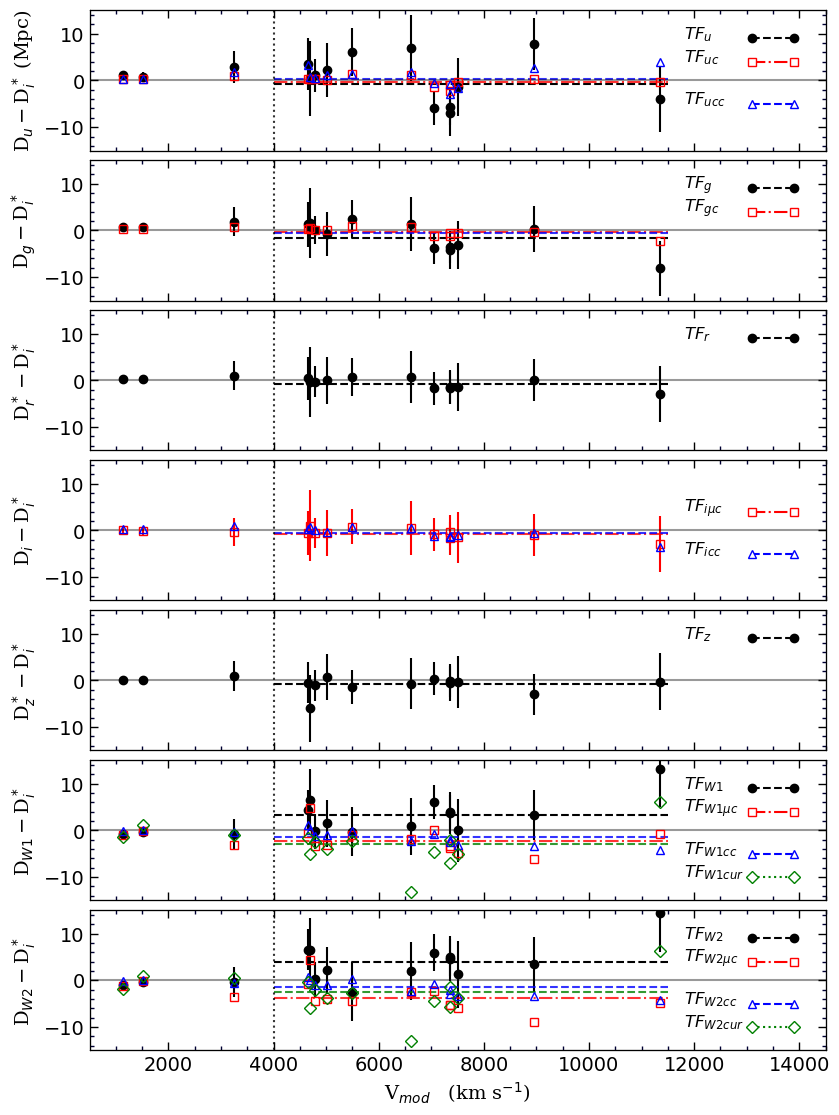

In [18]:
fig = py.figure(figsize=(8, 13), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(7,1) ; p=0

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

band1  = 'i'  # base band

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareD(ax, band1, 'u')
ax.set_ylabel('D'+r'$_{u}-$'+'D'+r'$^*_{i}$'+' (Mpc)', fontsize=14, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)

ax.plot([13100,13900],[9,9], 'o--', color='k')
ax.text(11800, 9, r'$TF_{u}$', color='k', fontsize=12)

ax.plot([13100,13900],[4,4], 's-.', color='red', mfc='white')
ax.text(11800, 4, r'$TF_{uc}$', color='k', fontsize=12)

ax.plot([13100,13900],[-5,-5], '^--', color='blue', mfc='white')
ax.text(11800, -5, r'$TF_{ucc}$', color='k', fontsize=12)



ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareD(ax, band1, 'g')
ax.set_ylabel('D'+r'$_{g}-$'+'D'+r'$^*_{i}$', fontsize=14, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)

ax.plot([13100,13900],[9,9], 'o--', color='k')
ax.text(11800, 9, r'$TF_{g}$', color='k', fontsize=12)

ax.plot([13100,13900],[4,4], 's-.', color='red', mfc='white')
ax.text(11800, 4, r'$TF_{gc}$', color='k', fontsize=12)

# ax.plot([13100,13900],[-5,-5], '^--', color='blue', mfc='white')
# ax.text(11800, -5, r'$TF_{gcc}$', color='k', fontsize=12)





ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareD(ax, band1, 'r')
ax.set_ylabel('D'+r'$^*_{r}-$'+'D'+r'$^*_{i}$', fontsize=14, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)

ax.plot([13100,13900],[9,9], 'o--', color='k')
ax.text(11800, 9, r'$TF_{r}$', color='k', fontsize=12)



ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareD(ax, band1, 'i')
ax.set_ylabel('D'+r'$_{i}-$'+'D'+r'$^*_{i}$', fontsize=14, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)

ax.plot([13100,13900],[4,4], 's-.', color='red', mfc='white')
ax.text(11800, 4, r'$TF_{i \mu c}$', color='k', fontsize=12)

ax.plot([13100,13900],[-5,-5], '^--', color='blue', mfc='white')
ax.text(11800, -5, r'$TF_{icc}$', color='k', fontsize=12)


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareD(ax, band1, 'z')
ax.set_ylabel('D'+r'$^*_{z}-$'+'D'+r'$^*_{i}$', fontsize=14, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)

ax.plot([13100,13900],[9,9], 'o--', color='k')
ax.text(11800, 9, r'$TF_{z}$', color='k', fontsize=12)


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareD(ax, band1, 'w1')
ax.set_ylabel('D'+r'$_{W1}-$'+'D'+r'$^*_{i}$', fontsize=14, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)

ax.plot([13100,13900],[9,9], 'o--', color='k')
ax.text(11800, 9, r'$TF_{W1}$', color='k', fontsize=12)

ax.plot([13100,13900],[4,4], 's-.', color='red', mfc='white')
ax.text(11800, 4, r'$TF_{W1\mu c}$', color='k', fontsize=12)

ax.plot([13100,13900],[-5,-5], '^--', color='blue', mfc='white')
ax.text(11800, -5, r'$TF_{W1cc}$', color='k', fontsize=12)

ax.plot([13100,13900],[-10,-10], 'D:', color='g', mfc='white')
ax.text(11800, -10, r'$TF_{W1cur}$', color='k', fontsize=12)


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareD(ax, band1, 'w2')
ax.set_ylabel('D'+r'$_{W2}-$'+'D'+r'$^*_{i}$', fontsize=14, fontdict=font)

ax.plot([13100,13900],[9,9], 'o--', color='k')
ax.text(11800, 9, r'$TF_{W2}$', color='k', fontsize=12)

ax.plot([13100,13900],[4,4], 's-.', color='red', mfc='white')
ax.text(11800, 4, r'$TF_{W2\mu c}$', color='k', fontsize=12)

ax.plot([13100,13900],[-5,-5], '^--', color='blue', mfc='white')
ax.text(11800, -5, r'$TF_{W2cc}$', color='k', fontsize=12)

ax.plot([13100,13900],[-10,-10], 'D:', color='g', mfc='white')
ax.text(11800, -10, r'$TF_{W2cur}$', color='k', fontsize=12)


ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=14, fontdict=font)
plt.subplots_adjust(hspace=.07, wspace=0)

In [19]:
symcol = {}
symcol['V']  = 'black'
symcol['U']  = 'blue'
symcol['F']  = 'green'
symcol['Ce'] = 'dodgerblue'
symcol['An'] = 'olive'
symcol['Pe'] = 'darkgreen'
symcol['Hy'] = 'm'
symcol['A2'] = 'darkgoldenrod'
symcol['N41'] = 'orchid'
symcol['N5'] = 'firebrick'
symcol['Ca'] = 'sienna'
symcol['N8'] = 'slateblue'
symcol['N7'] = 'chocolate'
symcol['A1'] = 'red'
symcol['Co'] = 'maroon'
symcol['A4'] = 'deeppink'
symcol['N40']= 'magenta'
symcol['A5'] = 'crimson'
symcol['A26'] = 'purple'
symcol['He'] = 'indigo'

In [20]:


def myHubble(D, H0):
    return H0


def plotHubble(ax, band, param, Dlim = 50, labels=False):
    
#     band = 'u'
#     param = 'b'

    include_A26 = False
    if band in ['w1', 'w2'] and param in ['a','b']:
        include_A26 = True

    X  = []
    Y  = []
    Ye = []
    Ds = []
    H0s = []
    codes=[]
    
    Vs = []
    Ves = []
    DMs = []
    DMes = []
    
    for i, code in enumerate(grandClustersTable):
        myCluster = grandClustersTable[code]
        if band in myCluster:
            if param in myCluster[band]:
                Vmod = myCluster[band][param]['Vmod']
                Vmod_e = myCluster[band][param]['Vmod_e']
                Dmpc  = myCluster[band][param]['Dmpc']
                Dmpc_e = myCluster[band][param]['Dmpc_e']
                
                DM  = myCluster[band][param]['DM']
                DMe = myCluster[band][param]['DMe']

                H0 = Vmod/Dmpc
                H0e = H0*np.sqrt(Vmod_e**2/Vmod**2 + Dmpc_e**2/Dmpc**2)

                if (Dmpc>Dlim and code!='A26') or (code=='A26' and include_A26==True):
    #                 print code, myCluster[band][param]['name'], Dmpc
    
                    dye = 'k'
                    if labels: dye=symcol[code]
                    ax.errorbar(Dmpc, H0, xerr=Dmpc_e, yerr=H0e, color='k', fmt='o', capsize=2, 
                            elinewidth=0.5, capthick=0.5, ms=5, mfc=dye)
                    X.append(Dmpc)
                    Y.append(H0)
                    Ye.append(H0e)
                    
                    Vs.append(Vmod)
                    Ves.append(Vmod_e)
                    DMs.append(DM)
                    DMes.append(DMe)
                    
                else:
                    dye = 'k'
                    if labels: dye=symcol[code]
                    ax.errorbar(Dmpc, H0, xerr=Dmpc_e, yerr=H0e, color=dye, fmt='o', capsize=2, 
                            elinewidth=0.5, capthick=0.5, ms=5, mfc='white')   

                Ds.append(Dmpc)
                codes.append(code)
                H0s.append(H0)
                
    


    X = np.asarray(X)                
    Y = np.asarray(Y)
    Ye = np.asarray(Ye)
    fit, cov = curve_fit(myHubble, X , Y, sigma=Ye)
    H0_fit  = fit[0]
    H0e_fit = np.sqrt(cov[0])

    chi2 = np.sum(((Y-H0_fit)/Ye)**2)
    H_rms = np.sqrt(np.sum((Y-H0_fit)**2)/(len(X)))
#     np.sqrt(chi2/(len(X)-1))


    He_max = np.max([H0e_fit, H_rms])

    
    if labels:
        Ds = np.asarray(Ds)
        H0s = np.asarray(H0s)
        indx = np.argsort(Ds)
        for t, i in enumerate(indx):
            ax.text(Ds[i]-2, 52-3*(t%4), codes[i], color=symcol[codes[i]])
#             if H0s[i]>H0_fit:
#                 ax.text(Ds[i]-2, 55-3*(t%4), codes[i], color='red')
#             else: 
#                 ax.text(Ds[i]-2, 55-3*(t%4), codes[i], color='blue')            
  
## Keep this, Bayesian approach
#     Vs   = np.asarray(Vs)   
#     Ves  = np.asarray(Ves) 
#     DMs  = np.asarray(DMs) 
#     DMes = np.asarray(DMes) 
#     Ho_fit, _ = linMC_H0(DMs, Vs, DMes, Ves, nwalkers=100, nsteps=5000, ignore=1000)
#     print 'Bayesian', band, param, Ho_fit
    print band, param, H0_fit, H0e_fit, H_rms

    ax.set_xticks(np.arange(20, 180, step=40))
    ax.set_yticks(np.arange(50, 120, step=20))
    x_ax, y_ax = set_axes(ax, (0, 180), (40,120), fontsize=12)  
    y_ax.set_yticks(np.arange(50, 120, step=20))



    ax.plot([Dlim,Dlim],[40,50], ':', color='navy')
    ax.plot([Dlim,Dlim],[110,120], ':', color='navy')

    ax.plot([50,170],[H0_fit, H0_fit], 'r-')
    d = np.linspace(10,170,100)
    ax.plot(d, (H0_fit*d+200)/d, 'k:', linewidth=1)
    ax.plot(d, (H0_fit*d-200)/d, 'k:', linewidth=1)


    Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
    x0 = 0.6*Xlm[0]+0.4*Xlm[1]
    y0 = 0.15*Ylm[0]+0.85*Ylm[1]
    y1 = 0.25*Ylm[0]+0.75*Ylm[1]
    unit =''
    fntsize = 12
    col = 'k'
    
    if labels:
        x0 = 0.40*Xlm[0]+0.50*Xlm[1]
        y0 = 0.1*Ylm[0]+0.9*Ylm[1] 
        y1 = 0.2*Ylm[0]+0.8*Ylm[1] 
        fntsize = 14
        col='maroon'
        unit= '   km/s/Mpc'
    
    ax.text(x0,y0, r"$H_0 = $"+"%.1f" % H0_fit+'$\pm$'+"%.1f" % H0e_fit,fontsize=fntsize, color=col)
    ax.text(x0,y1, r"$rms = $"+"%.1f" % H_rms+unit,fontsize=12, color='k')

    return x_ax, y_ax



i a 75.31234943165234 [1.29424705] 3.7840760810509195


Text(0,0.5,'$V_{mod}/D_{i}$    [km s${^{-1}}$ Mpc${^{-1}}$]    ')

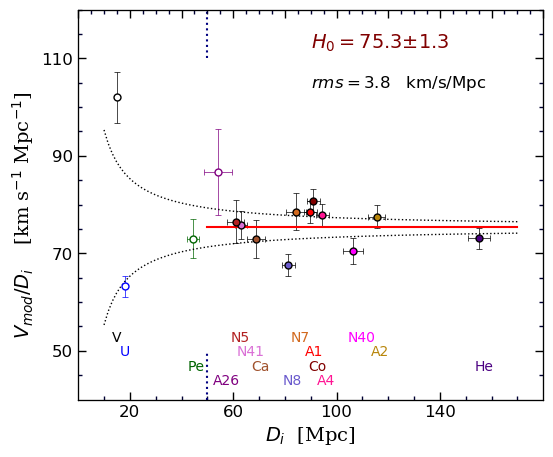

In [21]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

x_ax, y_ax = plotHubble(ax, 'i', 'a', labels=True)

ax.set_xlabel(r'$D_{i}$'+'  [Mpc]', fontsize=14, fontdict=font)
ax.set_ylabel(r'$V_{mod}/D_{i}$'+'    [km s'+r'${^{-1}}$'+' Mpc'+r'${^{-1}}$'+']    ', fontsize=14, fontdict=font)


u a 75.83741757723304 [2.20958636] 6.6923543759533874
u b 75.70404149691002 [1.4194631] 4.242528454186513
u c 75.3305476145527 [1.45538225] 4.38116170725894
g a 76.6987092485585 [1.65347373] 4.832581852701367
g b 75.49507169075349 [1.40683623] 4.007978095057641
r a 76.04702450332569 [1.36523089] 4.081827670123277
i a 75.31234943165234 [1.29424705] 3.7840760810509195
i b 75.91952263054019 [1.41392813] 4.0151203368787165
i c 75.76442475652532 [1.40913902] 4.041130053565368
z a 75.90692629851475 [1.27164613] 3.8358729231174267


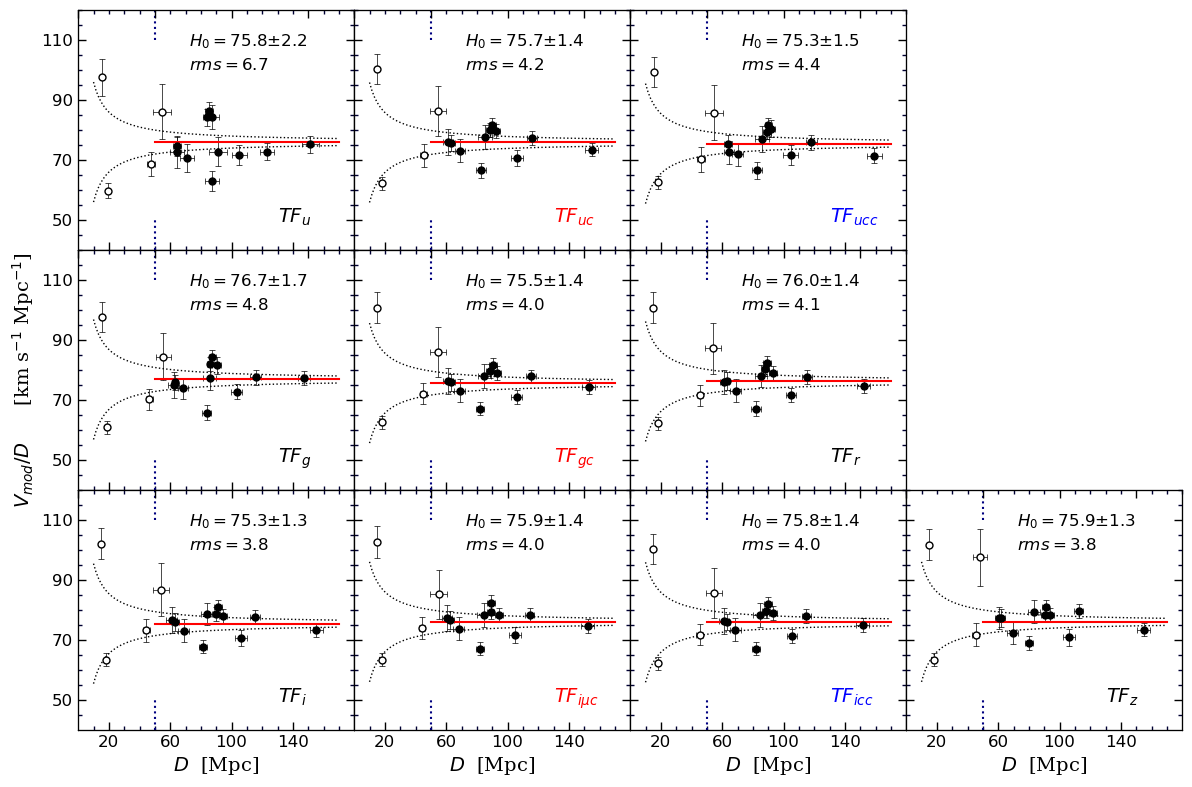

In [22]:

dye = {"u":"blue","g":"green","r":"red","i":"orange","z":"maroon","w1":"purple", 'w2': "brown"}

fig = py.figure(figsize=(12, 9), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(3,4) ; p=0



ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'u', 'a')
ax.text(130, 49,  r'$TF_{u}$', fontsize=14)
# ax.set_ylabel(r'$V_{mod}/D$'+' [km/s/Mpc]', fontsize=14, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'u', 'b')
ax.text(130, 49,  r'$TF_{uc}$', fontsize=14, color='r')
plt.setp(ax.get_yticklabels(), visible=False) 

ax = plt.subplot(gs[p]) ; p+=2
x_ax, y_ax = plotHubble(ax, 'u', 'c')
ax.text(130, 49,  r'$TF_{ucc}$', fontsize=14, color='b')
plt.setp(ax.get_yticklabels(), visible=False) 

###################

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'g', 'a')
ax.text(130, 49,  r'$TF_{g}$', fontsize=14)
ax.set_ylabel(r'$V_{mod}/D$'+'      [km s'+r'${^{-1}}$'+' Mpc'+r'${^{-1}}$'+']    ', fontsize=14, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'g', 'b')
ax.text(130, 49,  r'$TF_{gc}$', fontsize=14, color='r')
plt.setp(ax.get_yticklabels(), visible=False) 
ax.set_xlabel(r'$D$'+'  [Mpc]', fontsize=14, fontdict=font)

# ax = plt.subplot(gs[p]) ; p+=2
# x_ax, y_ax = plotHubble(ax, 'g', 'c')
# ax.text(130, 49,  r'$TF_{gcc}$', fontsize=14, color='b')
# plt.setp(ax.get_yticklabels(), visible=False) 
# ax.set_xlabel(r'$D$'+'  [Mpc]', fontsize=14, fontdict=font)
###################



ax = plt.subplot(gs[p]) ; p+=2
x_ax, y_ax = plotHubble(ax, 'r', 'a')
ax.text(130, 49,  r'$TF_{r}$', fontsize=14)
plt.setp(ax.get_yticklabels(), visible=False)

###################


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'i', 'a')
ax.text(130, 49,  r'$TF_{i}$', fontsize=14)
ax.set_xlabel(r'$D$'+'  [Mpc]', fontsize=14, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'i', 'b')
ax.text(130, 49,  r'$TF_{i \mu c}$', fontsize=14, color='r')
plt.setp(ax.get_yticklabels(), visible=False) 
ax.set_xlabel(r'$D$'+'  [Mpc]', fontsize=14, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'i', 'c')
ax.text(130, 49,  r'$TF_{icc}$', fontsize=14, color='b')
plt.setp(ax.get_yticklabels(), visible=False) 
ax.set_xlabel(r'$D$'+'  [Mpc]', fontsize=14, fontdict=font)

###################


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'z', 'a')
ax.text(130, 49,  r'$TF_{z}$', fontsize=14)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_xlabel(r'$D$'+'  [Mpc]', fontsize=14, fontdict=font)




plt.subplots_adjust(hspace=0, wspace=0)

w1 a 73.77996640438606 [0.88388353] 3.357153403159678
w1 b 78.13864269427772 [1.08426375] 3.811828669230715
w1 c 76.76767624690571 [1.42489603] 4.136536746805753
w1 d 78.27158350358071 [2.08813859] 7.281719059739393
w2 a 73.35293777475646 [0.95489132] 3.4313323116136147
w2 b 80.01301186695353 [1.0216936] 3.824228884484565
w2 c 76.77012889516378 [1.47539021] 4.2359635034668015
w2 d 77.90832177648585 [2.11914142] 7.47499011846917


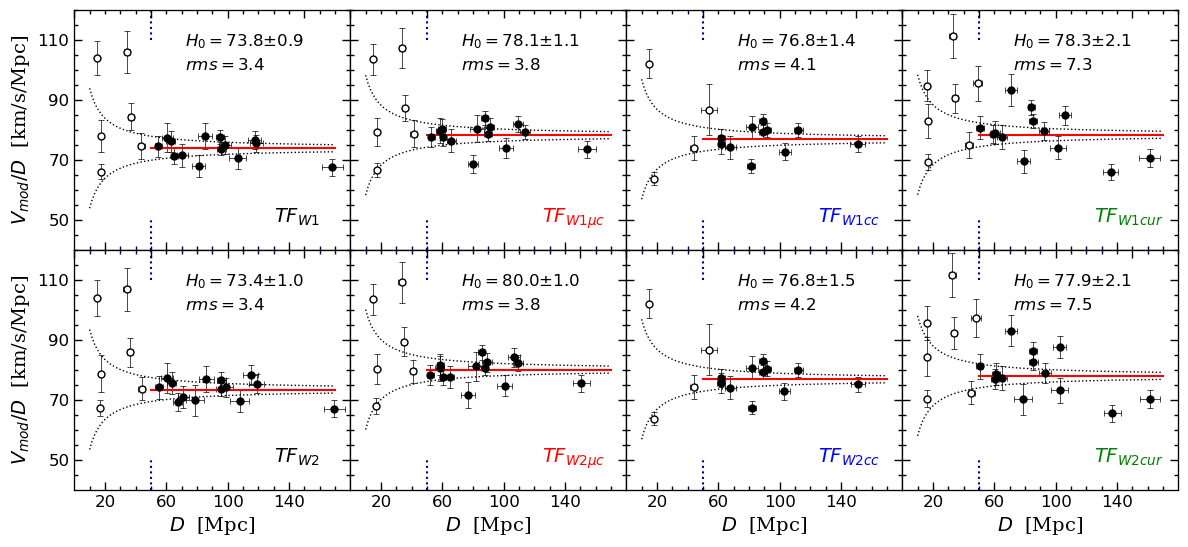

In [23]:

dye = {"u":"blue","g":"green","r":"red","i":"orange","z":"maroon","w1":"purple", 'w2': "brown"}

fig = py.figure(figsize=(12, 6), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(2,4) ; p=0


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'w1', 'a')
ax.text(130, 49,  r'$TF_{W1}$', fontsize=14)
# ax.set_ylabel(r'$V_{mod}/D$', fontsize=14, fontdict=font)
ax.set_ylabel(r'$V_{mod}/D$'+'  [km/s/Mpc]', fontsize=14, fontdict=font)


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'w1', 'b')
ax.text(125, 49,  r'$TF_{W1\mu c}$', fontsize=14, color='r')
plt.setp(ax.get_yticklabels(), visible=False)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'w1', 'c')
ax.text(125, 49,  r'$TF_{W1cc}$', fontsize=14, color='b')
plt.setp(ax.get_yticklabels(), visible=False)


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'w1', 'd')
ax.text(125, 49,  r'$TF_{W1cur}$', fontsize=14, color='g')
plt.setp(ax.get_yticklabels(), visible=False)

###################

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'w2', 'a')
ax.text(130, 49,  r'$TF_{W2}$', fontsize=14)
ax.set_xlabel(r'$D$'+'  [Mpc]', fontsize=14, fontdict=font)
# ax.set_ylabel(r'$V_{mod}/D$', fontsize=14, fontdict=font)
ax.set_ylabel(r'$V_{mod}/D$'+'  [km/s/Mpc]', fontsize=14, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'w2', 'b')
ax.text(125, 49,  r'$TF_{W2\mu c}$', fontsize=14, color='r')
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_xlabel(r'$D$'+'  [Mpc]', fontsize=14, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'w2', 'c')
ax.text(125, 49,  r'$TF_{W2cc}$', fontsize=14, color='b')
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_xlabel(r'$D$'+'  [Mpc]', fontsize=14, fontdict=font)


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'w2', 'd')
ax.text(125, 49,  r'$TF_{W2cur}$', fontsize=14, color='g')
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_xlabel(r'$D$'+'  [Mpc]', fontsize=14, fontdict=font)


plt.subplots_adjust(hspace=0, wspace=0)

In [24]:
def Plot_compareDM(ax, band1, band2, param2, color='k'):
    param1 = 'a'

    DMs = []
    DMes = []
    for code in grandClustersTable:
        myCluster = grandClustersTable[code]
        if band1 in myCluster and band2 in myCluster:
            Vmod = myCluster[band1][param1]['Vmod']
            D1  = myCluster[band1][param1]['Dmpc']
            D1e = myCluster[band1][param1]['Dmpc_e']
            DM1  = myCluster[band1][param1]['DM']
            DM1e = myCluster[band1][param1]['DMe']            
            
            D2  = myCluster[band2][param2]['Dmpc']
            D2e = myCluster[band2][param2]['Dmpc_e']
            DM2  = myCluster[band2][param2]['DM']
            DM2e = myCluster[band2][param2]['DMe']             

            Delta_D  = D2-D1
            Delta_De = np.sqrt(D1e**2+D2e**2)
            
            Delta_DM  = DM2-DM1
            Delta_DMe = np.sqrt(DM1e**2+DM2e**2)            
            

            ax.errorbar(Vmod, Delta_DM, yerr=Delta_DMe, fmt='o', color='k', mfc=symcol[code])
            
#             if Vmod>4000:
            DMs.append(Delta_DM)
            DMes.append(Delta_DMe)
                

    
    if len(DMs)>0:
        DMs  = np.asarray(DMs)
        DMes = np.asarray(DMes)
        
        DM_av  = np.sum(DMs/DMes**2) / np.sum(1./DMes**2)
        DM_ave = np.sqrt(np.sum((DMs-DM_av)**2/DMes**2) / np.sum(1./DMes**2))
       
        ax.plot([0,20000], [DM_av,DM_av], '--', color = color)         
        
        
        
    ax.plot([-10,20000], [0,0], 'k-', alpha=0.4)
#     ax.plot([4000,4000], [-100,100], 'k:', alpha=0.8)
    
    ax.ticklabel_format(style='sci')

    x_ax, y_ax = set_axes(ax, (500, 11500), (-0.45,0.45), fontsize=14)    
    
    
    Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
    x0 = 0.90*Xlm[0]+0.10*Xlm[1]
    y0 = 0.9*Ylm[0]+0.10*Ylm[1]
    ax.text(x0,y0, r"$\langle \Delta \/ DM \rangle \/\/ = \/ $"+"%.2f" % DM_av+'$\pm$'+"%.2f" % DM_ave+'  mag',fontsize=11, color=color)
    

    return x_ax, y_ax

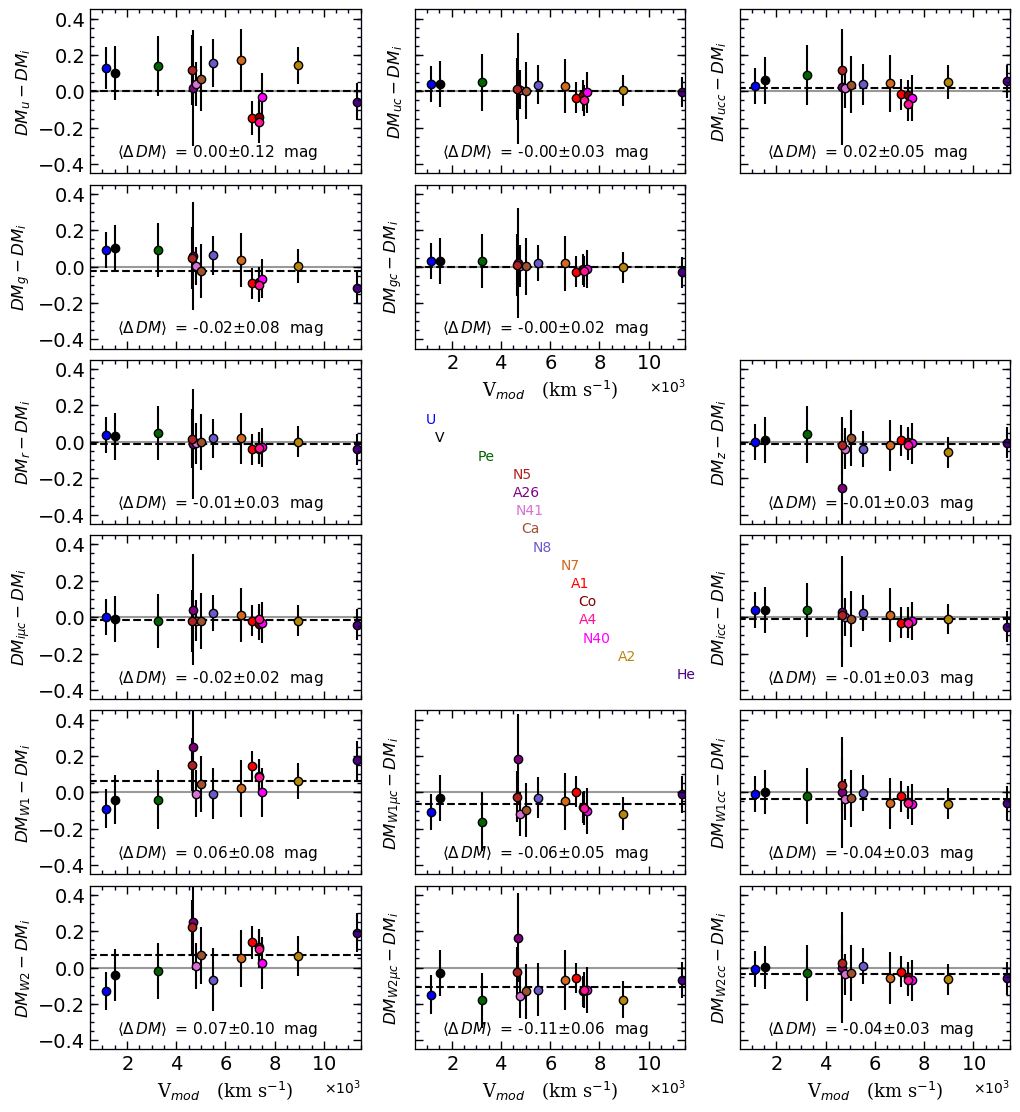

In [25]:
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_orderOfMagnitude(self, nothing):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin, vmax):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)
            
fig = py.figure(figsize=(10, 13), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(6,3) ; p=0

####################################################
ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'u', 'a', color='k')
ax.set_ylabel(r'$DM_u - DM_{i}$', fontsize=12, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'u', 'b', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{uc} - DM_{i}$', fontsize=12, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'u', 'c', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{ucc} - DM_{i}$', fontsize=12, fontdict=font)

####################################################

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'g', 'a', color='k')
ax.set_ylabel(r'$DM_g - DM_{i}$', fontsize=12, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(gs[p]) ; p+=2
x_ax, y_ax = Plot_compareDM(ax, 'i', 'g', 'b', color='k')
# plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{gc} - DM_{i}$', fontsize=12, fontdict=font)
ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)

# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, 'i', 'g', 'c', color='k')
# plt.setp(ax.get_xticklabels(), visible=False)
# plt.setp(ax.get_yticklabels(), visible=False)
# ax.set_ylabel(r'$DM_{gcc} - DM_{i}$', fontsize=12, fontdict=font)

####################################################


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'r', 'a', color='k')
ax.set_ylabel(r'$DM_r - DM_{i}$', fontsize=12, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)

####****************************
####****************************
ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = set_axes(ax, (500, 11500), (-0.45,0.45), fontsize=14)

Vmods = []
codes = []
for code in grandClustersTable:
    myCluster = grandClustersTable[code]
    if 'i' in myCluster:
        Vmod = myCluster['i']['a']['Vmod']
        Vmods.append(Vmod)
        codes.append(code)


Vmods = np.asarray(Vmods)
indx = np.argsort(Vmods)
for t, i in enumerate(indx):
    ax.text(Vmods[i]-200, 0.1-0.1*(t%20), codes[i], color=symcol[codes[i]])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
x_ax.get_xaxis().set_visible(False)
y_ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)
x_ax.set_frame_on(False)
y_ax.set_frame_on(False)

####****************************
####****************************



ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'z', 'a', color='k')
ax.set_ylabel(r'$DM_z - DM_{i}$', fontsize=12, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

####################################################

ax = plt.subplot(gs[p]) ; p+=2

x_ax, y_ax = Plot_compareDM(ax, 'i', 'i', 'b', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$DM_{i \mu c} - DM_{i}$', fontsize=12, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'i', 'c', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{icc} - DM_{i}$', fontsize=12, fontdict=font)

####****************************
####****************************
# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = set_axes(ax, (500, 11500), (-0.45,0.45), fontsize=14)

# Vmods = []
# codes = []
# for code in grandClustersTable:
#     myCluster = grandClustersTable[code]
#     if 'i' in myCluster:
#         Vmod = myCluster['i']['a']['Vmod']
#         Vmods.append(Vmod)
#         codes.append(code)


# Vmods = np.asarray(Vmods)
# indx = np.argsort(Vmods)
# for t, i in enumerate(indx):
#     ax.text(Vmods[i]-200, 0.3-0.1*(t%8), codes[i], color=symcol[codes[i]])
# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)
# x_ax.get_xaxis().set_visible(False)
# y_ax.get_yaxis().set_visible(False)
# ax.set_frame_on(False)
# x_ax.set_frame_on(False)
# y_ax.set_frame_on(False)

####****************************
####****************************

####################################################

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'w1', 'a', color='k')
ax.set_ylabel(r'$DM_{W1} - DM_{i}$', fontsize=12, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'w1', 'b', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{W1 \mu c} - DM_{i}$', fontsize=12, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'w1', 'c', color='k')
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$DM_{W1cc} - DM_{i}$', fontsize=12, fontdict=font)

####################################################

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'w2', 'a', color='k')
ax.set_ylabel(r'$DM_{W2} - DM_{i}$', fontsize=12, fontdict=font)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)
ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'w2', 'b', color='k')
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{W2 \mu c} - DM_{i}$', fontsize=12, fontdict=font)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)
ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'w2', 'c', color='k')
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{W2cc} - DM_{i}$', fontsize=12, fontdict=font)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)
ax.ticklabel_format(style='sci',scilimits=(1,3),axis='x', useMathText=True)

ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))


plt.subplots_adjust(hspace=0.07, wspace=0.2)


[(0.0847964235395257, 0.03372488147862443, 0.03346084954169775)] 0.0847964235395257 0.03381711665671125


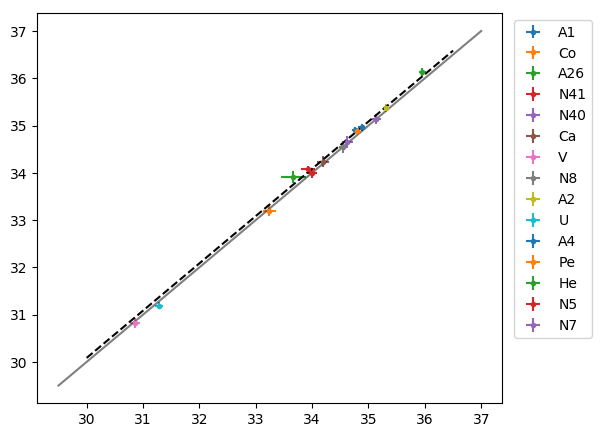

In [26]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

band1 = 'i'
param1 = 'a'

band2 = 'w1'
param2 = 'a'

Dm1lst = []
Dm2lst = []
Dm1lste = []
Dm2lste = []
for code in grandClustersTable:
    myCluster = grandClustersTable[code]
    if band1 in myCluster and band2 in myCluster:
        Vmod = myCluster[band1][param1]['Vmod']
        D1  = myCluster[band1][param1]['Dmpc']
        D1e = myCluster[band1][param1]['Dmpc_e']
        DM1  = myCluster[band1][param1]['DM']
        DM1e = myCluster[band1][param1]['DMe']            

        D2  = myCluster[band2][param2]['Dmpc']
        D2e = myCluster[band2][param2]['Dmpc_e']
        DM2  = myCluster[band2][param2]['DM']
        DM2e = myCluster[band2][param2]['DMe']
        
        ax.errorbar(DM1, DM2, xerr=DM1e, yerr=DM2e, fmt='.', label=code)
        if Vmod>4000:
            Dm1lst.append(DM1)
            Dm2lst.append(DM2)
            Dm1lste.append(DM1e)
            Dm2lste.append(DM2e)
        
ax.legend(loc=2, bbox_to_anchor=(1.01, 1.001))

ax.plot([29.5,37], [29.5,37], 'k-', alpha=0.5)

Dm1lst = np.asarray(Dm1lst)
Dm2lst = np.asarray(Dm2lst)
Dm1lste = np.asarray(Dm1lste)
Dm2lste = np.asarray(Dm2lste)

b, s =  linMCSlope1(Dm1lst, Dm2lst, Dm1lste, Dm2lste, nwalkers=100, nsteps=1000, ignore=100)
ax.plot([30,36.5], [30+b[0][0],36.5+b[0][0]], 'k--')

print b, np.median(s), np.std(s)

Text(0.5,0,'V$_{mod}$   (km s$^{-1}$)  [this study]')

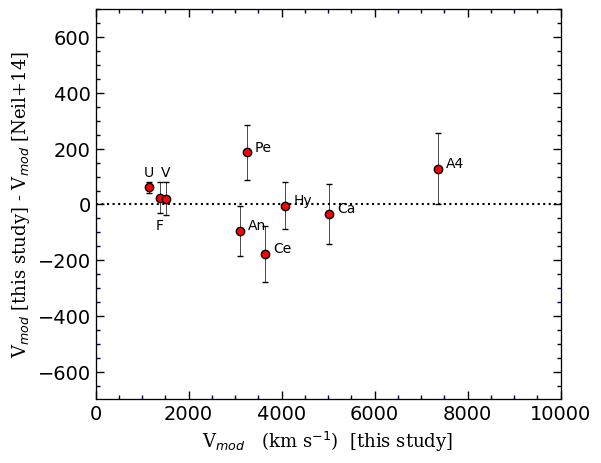

In [27]:
Neil_Vmod = {}

key = 'V'  # Virgo
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 1495.
Neil_Vmod[key]['Vmod_e'] = 37.

key = 'U'  # Ursa Major
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 1079.
Neil_Vmod[key]['Vmod_e'] = 14.

key = 'F'  # Fornax
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 1358.
Neil_Vmod[key]['Vmod_e'] = 45.

key = 'An'  # Antlia
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 3198.
Neil_Vmod[key]['Vmod_e'] = 74.

key = 'Ce'  # Centaurus
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 3823.
Neil_Vmod[key]['Vmod_e'] = 82.

key = 'Pe'  # Pegasus
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 3062.
Neil_Vmod[key]['Vmod_e'] = 78.

key = 'Hy'  # Hydra
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 4088.
Neil_Vmod[key]['Vmod_e'] = 72.


key = 'Ca'  # Cancer
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 5059.
Neil_Vmod[key]['Vmod_e'] = 82.


key = 'A4'  # A400
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 7228.
Neil_Vmod[key]['Vmod_e'] = 97.

key = 'A1367'  # 
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 6969.
Neil_Vmod[key]['Vmod_e'] = 93.


key = 'Coma'  # 
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 7370.
Neil_Vmod[key]['Vmod_e'] = 76.

key = 'A2634/66'  # 
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 8938.
Neil_Vmod[key]['Vmod_e'] = 164.

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

for code in grandClustersTable:
    
    cluster = grandClustersTable[code]['w1']['a']
    
    if code in Neil_Vmod:
        Neilcls = Neil_Vmod[code]
#         print code, cluster['Vmod'], cluster['Vmod_e'], Neilcls['Vmod'], Neilcls['Vmod_e']
        
        myV   = cluster['Vmod']
        myVe  = cluster['Vmod_e']
        NeiV  = Neilcls['Vmod']
        NeiVe = Neilcls['Vmod_e']
        
        DeltaV  = myV - NeiV
        DeltaVe = np.sqrt(myVe**2+NeiVe**2) 
        
        ax.errorbar(myV, DeltaV, xerr=myVe*0, yerr=DeltaVe, 
                    fmt='o', capsize=2, 
                    elinewidth=0.5, capthick=1, ms=6, color='k', mfc='red')
        
        if myV<2000:
            
            if code!='F':
                ax.text(myV-100, DeltaV+DeltaVe+20, code)
            
            else:
                ax.text(myV-100, DeltaV-DeltaVe-60, code)
        else:
            ax.text(myV+170, DeltaV+5, code)
        
ax.plot([10,20000],[0,0], 'k:')

x_ax, y_ax = set_axes(ax, (0, 10000), (-700,700), fontsize=14)  

ax.set_ylabel('V'+r'$_{mod}$'+ ' [this study] - V'+r'$_{mod}$'+ ' [Neil+14]', fontsize=13, fontdict=font)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')  [this study]', fontsize=13, fontdict=font)




NameError: name 'Brent_Vcmb' is not defined

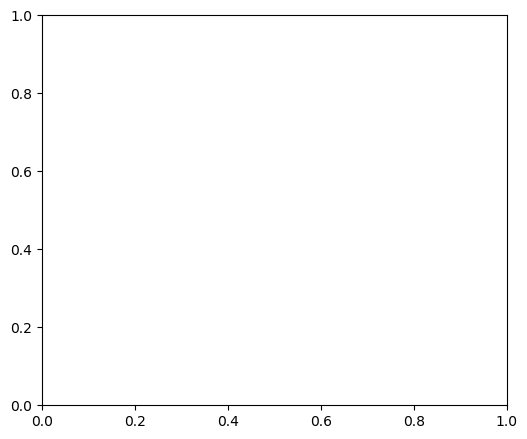

In [28]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

for code in grandClustersTable:
    
    cluster = grandClustersTable[code]['w1']['a']
    
    if code in Neil_Vmod:
        Neilcls = Neil_Vmod[code]
        NeiV  = Neilcls['Vmod']
        NeiVe = Neilcls['Vmod_e']

        BrntCls = Brent_Vcmb[code]
        BrentV  = BrntCls['Vcmb']        
        omegam=0.27
        omegal=1.-omegam
        c=299800.
        z=BrentV/c
        q0=0.5*(omegam-2.*omegal)
        fmod=1.+0.5*(1.-q0)*z-(1./6)*(1.-q0-3.*q0**2+1.)*z**2
        BrentV=c*z*fmod
        
        
        
        
        DeltaV  = NeiV - BrentV
        DeltaVe = NeiVe
        
        ax.errorbar(BrentV, DeltaV, xerr=myVe*0, yerr=DeltaVe, 
                    fmt='o', capsize=2, 
                    elinewidth=0.5, capthick=1, ms=6, color='k', mfc='red')
        
        if BrentV<2000:
            
            if code!='F':
                ax.text(BrentV-100, DeltaV+DeltaVe+20, code)
            
            else:
                ax.text(BrentV-500, DeltaV-DeltaVe-120, code)
        else:
            ax.text(BrentV+170, DeltaV-20, code)
        
ax.plot([10,20000],[0,0], 'k:')

x_ax, y_ax = set_axes(ax, (0, 10000), (-700,700), fontsize=14)  

ax.set_ylabel('V'+r'$_{mod}$'+ ' [Neil+14] - V'+r'$_{mod}$'+ ' [TC+12]', fontsize=13, fontdict=font)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')  [TC+12]', fontsize=13, fontdict=font)


